# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Load the Dataset

In [2]:
df = pd.read_csv('../Data\merged_cleaned.csv', index_col=[0], parse_dates=[0])

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\TimPr\AppData\Local\Temp\ipykernel_8488\3441950196.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('../Data\merged_cleaned.csv', index_col=[0], parse_dates=[0])


In [3]:
df.head()

Gesamt (Netzlast) [MWh] Berechnete Auflösungen  \
Date                                                                  
2018-11-01 01:00:00                                        47312.50   
2018-11-01 02:00:00                                        46093.75   
2018-11-01 03:00:00                                        46710.50   
2018-11-01 04:00:00                                        47624.25   
2018-11-01 05:00:00                                        48945.00   

                     Deutschland/Luxemburg [€/MWh] Originalauflösungen  \
Date                                                                     
2018-11-01 01:00:00                                              40.86   
2018-11-01 02:00:00                                              41.10   
2018-11-01 03:00:00                                              40.59   
2018-11-01 04:00:00                                              40.09   
2018-11-01 05:00:00                                              39.11   

                     Biomasse [MWh] Berechnete Auflösungen  \
Date                                                         
2018-11-01 01:00:00                                4754.75   
2018-11-01 02:00:00                                4741.25   
2018-11-01 03:00:00                                4733.25   
2018-11-01 04:00:00                                4725.25   
2018-11-01 05:00:00                                4715.00   

                     Wasserkraft [MWh] Berechnete Auflösungen  \
Date                                                            
2018-11-01 01:00:00                                   1583.00   
2018-11-01 02:00:00                                   1587.50   
2018-11-01 03:00:00                                   1567.50   
2018-11-01 04:00:00                                   1550.00   
2018-11-01 05:00:00                                   1535.75   

                     Wind Offshore [MWh] Berechnete Auflösungen  \
Date                                                              
2018-11-01 01:00:00                                     2721.00   
2018-11-01 02:00:00                                     2678.00   
2018-11-01 03:00:00                                     2836.75   
2018-11-01 04:00:00                                     2968.50   
2018-11-01 05:00:00                                     2765.25   

                     Wind Onshore [MWh] Berechnete Auflösungen  \
Date                                                             
2018-11-01 01:00:00                                   11628.50   
2018-11-01 02:00:00                                   11029.00   
2018-11-01 03:00:00                                   11025.00   
2018-11-01 04:00:00                                   10480.25   
2018-11-01 05:00:00                                   10871.25   

                     Photovoltaik [MWh] Berechnete Auflösungen  \
Date                                                             
2018-11-01 01:00:00                                        0.0   
2018-11-01 02:00:00                                        0.0   
2018-11-01 03:00:00                                        0.0   
2018-11-01 04:00:00                                        0.0   
2018-11-01 05:00:00                                        0.0   

                     Sonstige Erneuerbare [MWh] Berechnete Auflösungen  \
Date                                                                     
2018-11-01 01:00:00                                             153.00   
2018-11-01 02:00:00                                             153.00   
2018-11-01 03:00:00                                             153.00   
2018-11-01 04:00:00                                             152.50   
2018-11-01 05:00:00                                             152.75   

                     Kernenergie [MWh] Berechnete Auflösungen  \
Date                                                            
2018-11-01 01:00:00                                    7933.0   
201

## Data dimensions and description:

In [4]:
# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())
print(df.info())


Number of samples: 52619
Number of features: 34
Example data:
                     Gesamt (Netzlast) [MWh] Berechnete Auflösungen  \
Date                                                                  
2018-11-01 01:00:00                                        47312.50   
2018-11-01 02:00:00                                        46093.75   
2018-11-01 03:00:00                                        46710.50   
2018-11-01 04:00:00                                        47624.25   
2018-11-01 05:00:00                                        48945.00   

                     Deutschland/Luxemburg [€/MWh] Originalauflösungen  \
Date                                                                     
2018-11-01 01:00:00                                              40.86   
2018-11-01 02:00:00                                              41.10   
2018-11-01 03:00:00                                              40.59   
2018-11-01 04:00:00                                              40.09

In [5]:
df.columns

Index(['Gesamt (Netzlast) [MWh] Berechnete Auflösungen',
       'Deutschland/Luxemburg [€/MWh] Originalauflösungen',
       'Biomasse [MWh] Berechnete Auflösungen',
       'Wasserkraft [MWh] Berechnete Auflösungen',
       'Wind Offshore [MWh] Berechnete Auflösungen',
       'Wind Onshore [MWh] Berechnete Auflösungen',
       'Photovoltaik [MWh] Berechnete Auflösungen',
       'Sonstige Erneuerbare [MWh] Berechnete Auflösungen',
       'Kernenergie [MWh] Berechnete Auflösungen',
       'Braunkohle [MWh] Berechnete Auflösungen',
       'Steinkohle [MWh] Berechnete Auflösungen',
       'Erdgas [MWh] Berechnete Auflösungen',
       'Pumpspeicher [MWh] Berechnete Auflösungen_y',
       'Sonstige Konventionelle [MWh] Berechnete Auflösungen', 'Holiday',
       'date', 'hour', 'dayofweek', 'day_name', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'date_offset', 'hour_sin', 'hour_cos',
       'dayofweek_sin', 'dayofweek_cos', 'month_sin', 'month_cos',
       'dayofyear_sin', 'd

## Feature Distributions



In [6]:
import plotly.express as px

# Create the plot using Plotly Express
fig = px.line(df, 
              x=df.index, 
              y='Gesamt (Netzlast) [MWh] Berechnete Auflösungen', 
              title='Gesamt Netzlast over the Years', 
              labels={'Gesamt (Netzlast) [MWh] Berechnete Auflösungen': 'Gesamt Netzlast [MWh]', 
                      'date': 'Date'})

# Show the plot
fig.show()


In [26]:
df2 = pd.DataFrame()
df2['Value'] = df['Gesamt (Netzlast) [MWh] Berechnete Auflösungen']
df2['DATE'] = df2.index
df2.head()

Value                DATE
Date                                             
2018-11-01 01:00:00  47312.50 2018-11-01 01:00:00
2018-11-01 02:00:00  46093.75 2018-11-01 02:00:00
2018-11-01 03:00:00  46710.50 2018-11-01 03:00:00
2018-11-01 04:00:00  47624.25 2018-11-01 04:00:00
2018-11-01 05:00:00  48945.00 2018-11-01 05:00:00

Number of missing values: 0
Number of missing values after cleaning: 0


C:\Users\TimPr\AppData\Local\Temp\ipykernel_8488\2152509351.py:22: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



ValueError: This function does not handle missing values

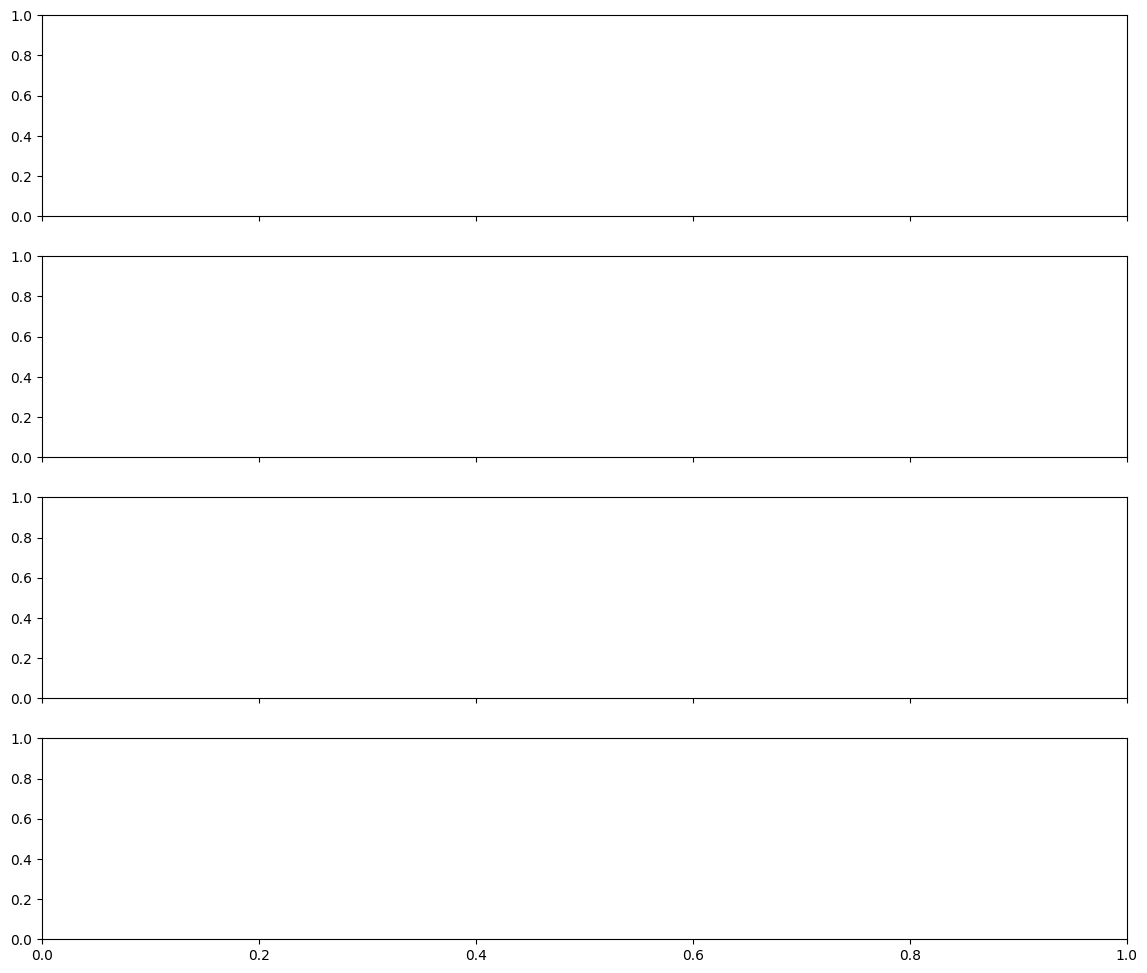

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

# Assuming df2 is your dataframe with 'Value' and 'DATE' columns
# First, let's make sure the DATE column is in datetime format
df2['DATE'] = pd.to_datetime(df2['DATE'])

# Set the DATE column as the index
df2 = df2.set_index('DATE')

# Check for missing values
print(f"Number of missing values: {df2['Value'].isna().sum()}")

# Handle missing values by interpolation
df2_clean = df2.copy()
df2_clean['Value'] = df2_clean['Value'].interpolate(method='time')

# Fill any remaining missing values (e.g., at the beginning of the series)
df2_clean['Value'] = df2_clean['Value'].fillna(method='bfill')

# Final check for missing values
print(f"Number of missing values after cleaning: {df2_clean['Value'].isna().sum()}")

# Create a figure with 4 subplots
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# 1. Original Data and Trend
# Decompose the time series for weekly seasonality (period=168 for hourly data: 24*7)
weekly_decomposition = seasonal_decompose(df2_clean['Value'], model='additive', period=168)

# 2. Weekly Seasonality
weekly_seasonal = weekly_decomposition.seasonal

# 3. Daily Seasonality
# Decompose using period=24 for daily patterns
daily_decomposition = seasonal_decompose(weekly_decomposition.resid, model='additive', period=24)
daily_seasonal = daily_decomposition.seasonal

# 4. Residuals (what's left after removing trend, weekly and daily seasonality)
residuals = daily_decomposition.resid

# Plot the original data and trend
axes[0].plot(df2_clean['Value'], label='Original Data', color='blue')
axes[0].plot(weekly_decomposition.trend, label='Trend', color='red')
axes[0].set_title('Original Time Series and Trend')
axes[0].legend()
axes[0].set_ylabel('Power Load (MWh)')

# Plot weekly seasonality
axes[1].plot(weekly_seasonal, color='green')
axes[1].set_title('Weekly Seasonality')
axes[1].set_ylabel('Weekly Effect (MWh)')

# Plot daily seasonality
axes[2].plot(daily_seasonal, color='purple')
axes[2].set_title('Daily Seasonality')
axes[2].set_ylabel('Daily Effect (MWh)')

# Plot residuals
axes[3].plot(residuals, color='gray')
axes[3].set_title('Residuals')
axes[3].set_ylabel('Residuals (MWh)')
axes[3].set_xlabel('Date')

# Format the layout
plt.tight_layout()
plt.show()

# Optional: Display descriptive statistics of residuals
print("Residuals Statistics:")
print(residuals.describe())

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the load data to the left y-axis
fig.add_trace(
    go.Scatter(x=df.index, 
               y=df['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'], 
               mode='lines', 
               name='Load (Netzlast)', 
               line=dict(color='blue')),
    secondary_y=False
)

# Add the price data to the right y-axis
fig.add_trace(
    go.Scatter(x=df.index, 
               y=df['Deutschland/Luxemburg [€/MWh] Originalauflösungen'], 
               mode='lines', 
               name='Price (€)', 
               line=dict(color='red')),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title_text="Load and Price over Entire Time Period",
    xaxis_title="Date",
    yaxis_title="Load (MWh)",
    yaxis2_title="Price (€)",
    showlegend=True
)

# Show the plot
fig.show()


In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for two weeks
df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

# Create subplots with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the load data to the left y-axis
fig.add_trace(
    go.Scatter(x=df_filtered.index, 
               y=df_filtered['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'], 
               mode='lines', 
               name='Load (Netzlast)', 
               line=dict(color='blue')),
    secondary_y=False
)

# Add the price data to the right y-axis
fig.add_trace(
    go.Scatter(x=df_filtered.index, 
               y=df_filtered['Deutschland/Luxemburg [€/MWh] Originalauflösungen'], 
               mode='lines', 
               name='Price (€)', 
               line=dict(color='red')),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title_text="Load and Price over Two Weeks",
    xaxis_title="Date",
    yaxis_title="Load (MWh)",
    yaxis2_title="Price (€)",
    showlegend=True
)

# Show the plot
fig.show()


NameError: name 'start_date' is not defined

In [ ]:
import plotly.express as px
import pandas as pd

# Ensure that the 'date' column is in datetime format if it's not already
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as index
df.set_index('date', inplace=True)

# Group by month and aggregate the energy production for each category
monthly_renewables = df[renewables].resample('M').sum()
monthly_conventional_energy = df[conventional_energy].resample('M').sum()
monthly_other_renewables = df[other_renewables].resample('M').sum()

# Create a plot for each category
fig_renewables = px.bar(monthly_renewables, x=monthly_renewables.index, y=monthly_renewables.columns,
                         title="Monthly Renewable Energy Production",
                         labels={"value": "Energy Production (MWh)", "date": "Month"},
                         barmode="stack")
fig_renewables.show()

fig_conventional_energy = px.bar(monthly_conventional_energy, x=monthly_conventional_energy.index, y=monthly_conventional_energy.columns,
                                 title="Monthly Conventional Energy Production",
                                 labels={"value": "Energy Production (MWh)", "date": "Month"},
                                 barmode="stack")
fig_conventional_energy.show()

fig_other_renewables = px.bar(monthly_other_renewables, x=monthly_other_renewables.index, y=monthly_other_renewables.columns,
                              title="Monthly Other Energy Production",
                              labels={"value": "Energy Production (MWh)", "date": "Month"},
                              barmode="stack")
fig_other_renewables.show()


C:\Users\TimPr\AppData\Local\Temp\ipykernel_12216\1836959224.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\TimPr\AppData\Local\Temp\ipykernel_12216\1836959224.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\TimPr\AppData\Local\Temp\ipykernel_12216\1836959224.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



## Correlations


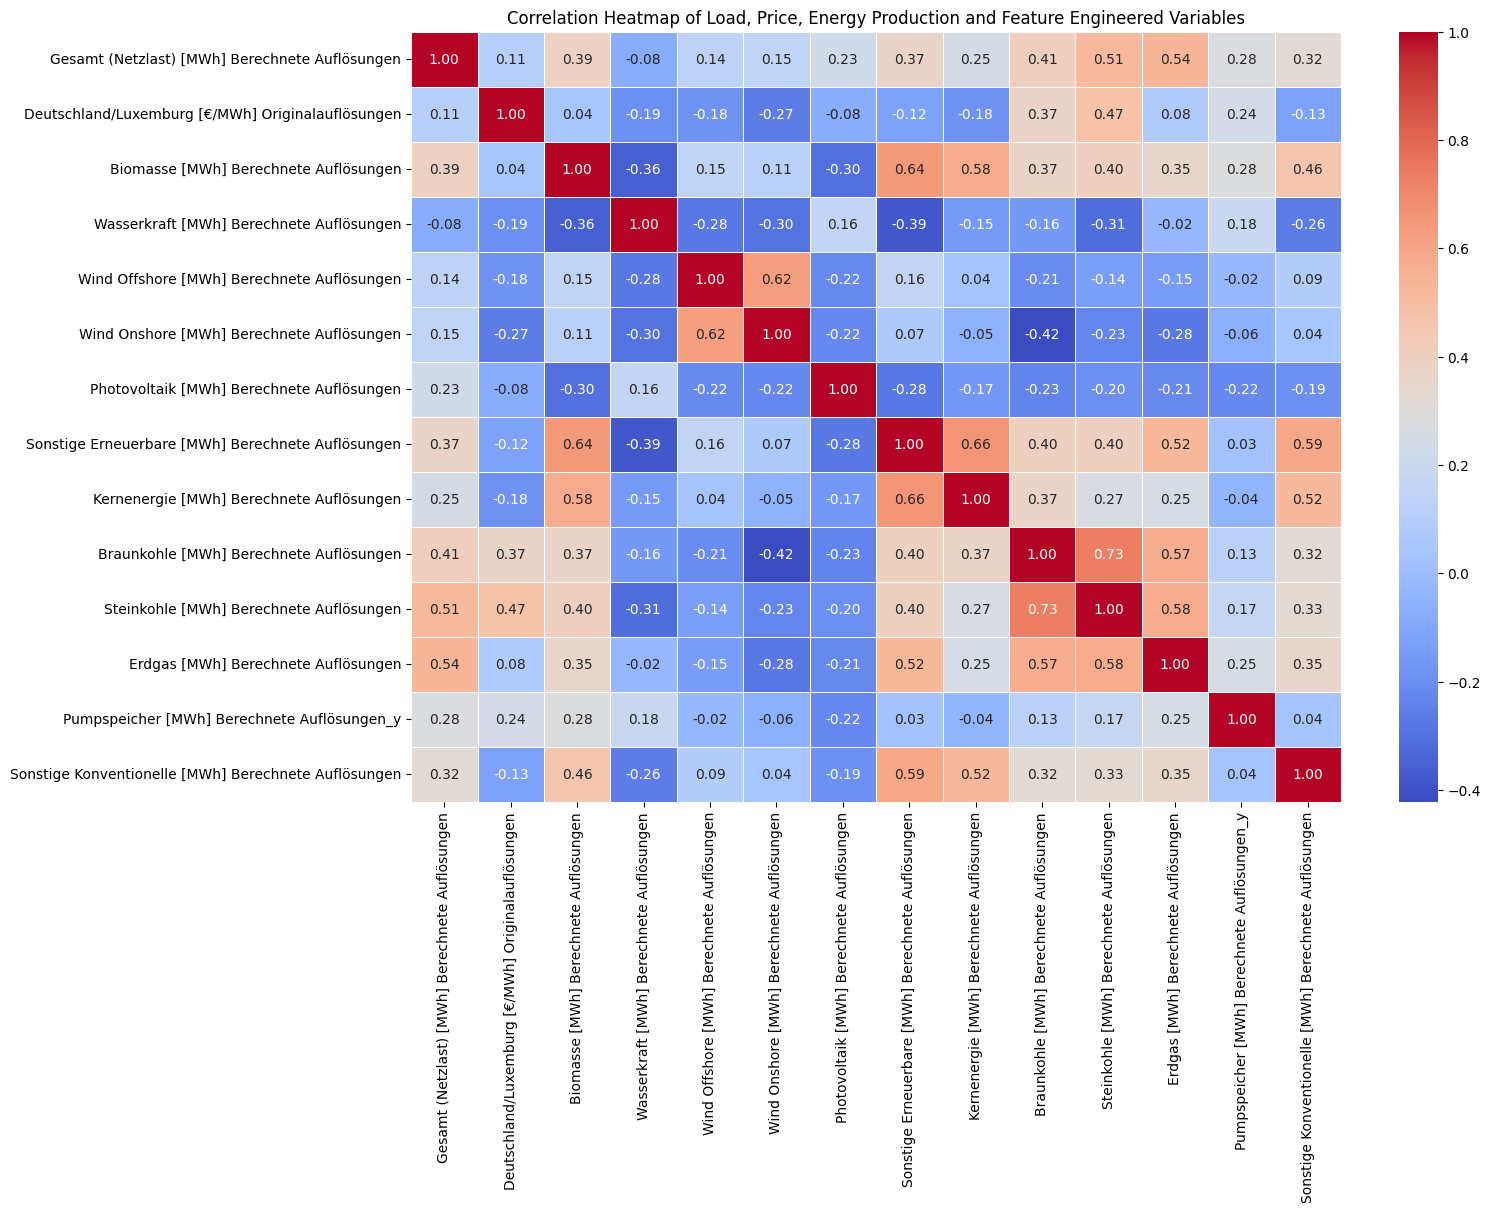

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant columns for correlation
all_columns = [
    'Gesamt (Netzlast) [MWh] Berechnete Auflösungen',
    'Deutschland/Luxemburg [€/MWh] Originalauflösungen',
    'Biomasse [MWh] Berechnete Auflösungen',
    'Wasserkraft [MWh] Berechnete Auflösungen',
    'Wind Offshore [MWh] Berechnete Auflösungen',
    'Wind Onshore [MWh] Berechnete Auflösungen',
    'Photovoltaik [MWh] Berechnete Auflösungen',
    'Sonstige Erneuerbare [MWh] Berechnete Auflösungen',
    'Kernenergie [MWh] Berechnete Auflösungen',
    'Braunkohle [MWh] Berechnete Auflösungen',
    'Steinkohle [MWh] Berechnete Auflösungen',
    'Erdgas [MWh] Berechnete Auflösungen',
    'Pumpspeicher [MWh] Berechnete Auflösungen_y',
    'Sonstige Konventionelle [MWh] Berechnete Auflösungen'
]

# Compute the correlation matrix for all columns
corr_matrix_all = df[all_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Load, Price, Energy Production and Feature Engineered Variables')
plt.show()
